# House Price Project

Eugene Kim	eugenekim@cpp.edu / eugenek0529@gmail.com

Brandon Tang brandontang1@cpp.edu / brantang905@gmail.com 

Sanat Vankayalapati sanatv@cpp.edu / sanatvan@gmail.com

In [1]:
# general (for data exploration)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for the model (linear regression)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Data Exploration

In [2]:
data = pd.read_csv("resource/housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
unique_ocean_proximity = data['ocean_proximity'].unique()
print("Unique Ocean Proximity Values:", unique_ocean_proximity)

Unique Ocean Proximity Values: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [5]:
# Rplace above string values to integer values be used in training
data['ocean_proximity'] = data['ocean_proximity'].map({'NEAR BAY' : 0, '<1H OCEAN' : 1, 'INLAND' : 2, 'NEAR OCEAN' : 3, 'ISLAND' : 4})

In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


In [7]:
 data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# fill that 207 null values with mean values
new_data = data.copy()
new_data['total_bedrooms'] = new_data['total_bedrooms'].fillna(new_data['total_bedrooms'].mean())

# check for null now, 


In [9]:
 new_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Set x = the columns
Set y = medain_house_value, which we are aimed to predict

In [10]:
x = new_data.drop("median_house_value", axis=1)
y = new_data["median_house_value"]

### check for outlier

In [11]:
# For simple calculation drop longtitude and latitude (not important)
new_data = new_data.drop(['longitude', 'latitude'], axis=1)


new_data.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.464729
std,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,0.854226
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,1.000000
50%,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,2.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


In [12]:
# quantile the dataframe
    # dframe: data frame
    # cols: an list with the columns in the data frame
    # min_q: a lowest cutting point 
    # max_q: a highest cutting point
def fixing_outliers(dframe, cols, min_q, max_q):
    for i in cols: 
        # get the lowest point and highest point in the data
        min_thresold, max_thresold = dframe[i].quantile([min_q, max_q])
        
        # quantile the values between the min_thresold and the max_thresold
        dframe = dframe[(dframe[i] > min_thresold) & (dframe[i] < max_thresold)]
    return dframe


# data we want to quantify
cols = ['total_rooms', 'total_bedrooms', 'households', 'median_house_value', 'housing_median_age', 'population']
new_data = fixing_outliers(new_data.copy(), cols, 0.1, 0.99)

new_data.describe()


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,9317.000000,9317.000000,9317.000000,9317.000000,9317.000000,9317.000000,9317.000000,9317.000000
mean,28.405710,2915.358914,602.317788,1649.393904,569.896104,3.844241,208836.653429,1.411935
std,9.592348,1251.878440,248.045487,644.554525,226.078903,1.470063,88375.476270,0.847102
min,13.000000,948.000000,262.000000,871.000000,288.000000,0.683100,86200.000000,0.000000
25%,20.000000,2043.000000,419.000000,1161.000000,402.000000,2.750000,142000.000000,1.000000
50%,28.000000,2627.000000,537.870553,1481.000000,510.000000,3.640600,189800.000000,1.000000
75%,35.000000,3476.000000,716.000000,1949.000000,674.000000,4.708300,259400.000000,2.000000
max,51.000000,10282.000000,1780.000000,4027.000000,1474.000000,11.112100,500000.000000,3.000000


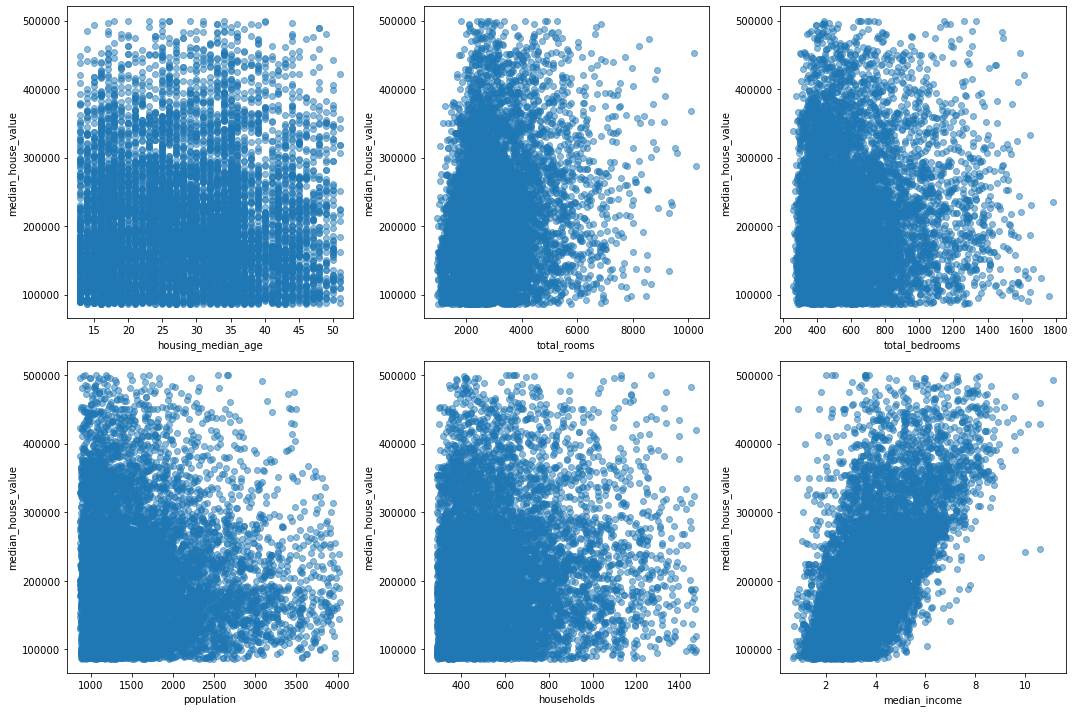

In [13]:
x = new_data.drop('median_house_value', axis=1)
y = new_data['median_house_value']


x = x.drop('ocean_proximity', axis=1)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the 2D array of subplots to make indexing easier
axes = axes.flatten()

# Plotting scatter plots for each feature against the target variable
for i, column in enumerate(x.columns):
    axes[i].scatter(x[column], y, alpha=0.5)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('median_house_value')

# Adjust layout
plt.tight_layout()
plt.show()


# Below is extra (model learning)

In [16]:



import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Log-transform the target variable
y_log = np.log1p(y)

# Create a new linear regression model
lin_model_log = LinearRegression()

# Fit the model with the log-transformed target variable
lin_model_log.fit(x, y_log)

# Make predictions
y_pred_log = lin_model_log.predict(x)

# Transform predictions back to the original scale
y_pred = np.expm1(y_pred_log)

# Evaluate the model on the log-transformed scale
mse_log = mean_squared_error(y_log, y_pred_log)
print(f"Mean Squared Error (Log-transformed): {mse_log}")


Mean Squared Error (Log-transformed): 0.07894672557800653


In [17]:
new_data_point = pd.DataFrame({
    'housing_median_age':  10,
    'total_rooms':  10000,
    'total_bedrooms':  5000,
    'population':  50000,
    'households':  2000,
    'median_income':  3.2
    
}, index=[0])

# Make predictions for the new data point
new_data_point_log = lin_model_log.predict(new_data_point)
new_data_point_price = np.expm1(new_data_point_log)

print("Predicted House Price:", new_data_point_price[0])

Predicted House Price: 883.0266609375792


In [42]:
# from sklearn.metrics import mean_squared_error


# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# # Model initialization and training
# lin_model = LinearRegression()
# lin_model.fit(x_train, y_train)


# # Model evaluation
# y_pred = lin_model.predict(x_test)
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2803944598.000371
